# **Tobacco Usage Method of Peference (California)**

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path

In [2]:
#Import CSV file, Read and Display
csvfile = pd.read_csv("Tobacco_Use_2017_California.csv")

In [3]:
#Split File for only columns needed in this analysis and rename columns
Tobacco_Use_CA = csvfile.iloc[:, :7]
Tobacco_Use_CA.columns = ['Year', 'Location', 'Consumation_Type', 'Usage_Measure', 'Usage_Frequency', 'Sample_Size', 'Gender']
Tobacco_Use_CA.head(27)

,Year,Location,Consumation_Type,Usage_Measure,Usage_Frequency,Sample_Size,Gender
0,2017,California,E-Cigarette Use (Adults),Frequency of Use,Every Day,172.0,Male
1,2017,California,Cigarette Use (Adults),Smoking Frequency,Some Days,954.0,Overall
2,2017,California,Cigarette Use (Adults),Smoking Frequency,Every Day,954.0,Overall
3,2017,California,Smokeless Tobacco Use (Adults),Frequency of Use,Some Days,NaN,Female
4,2017,California,Cigarette Use (Adults),Smoking Frequency,Every Day,372.0,Female
5,2017,California,E-Cigarette Use (Adults),User Status,Current,4236.0,Male
6,2017,California,Smokeless Tobacco Use (Adults),Frequency of Use,Every Day,132.0,Overall
7,2017,California,Smokeless Tobacco Use (Adults),User Status,Current,4284.0,Male
8,2017,California,Cigarette Use (Adults),Smoking Status,Current,4438.0,Female
9,2017,California,Smokeless Tobacco Use (Adults),Frequency of Use,Every Day,NaN,Female


**Sample Size**

In [4]:
# Determine the total Sample_Size for California ignoring the NaN
sample_size_sum = Tobacco_Use_CA['Sample_Size'].dropna().sum()
sample_size_sum

57560.0

**Comparison between preferred consumation Type**

Consumation_Type
Cigarette Use (Adults)            21248.0
E-Cigarette Use (Adults)          18364.0
Smokeless Tobacco Use (Adults)    17948.0
Name: Sample_Size, dtype: float64


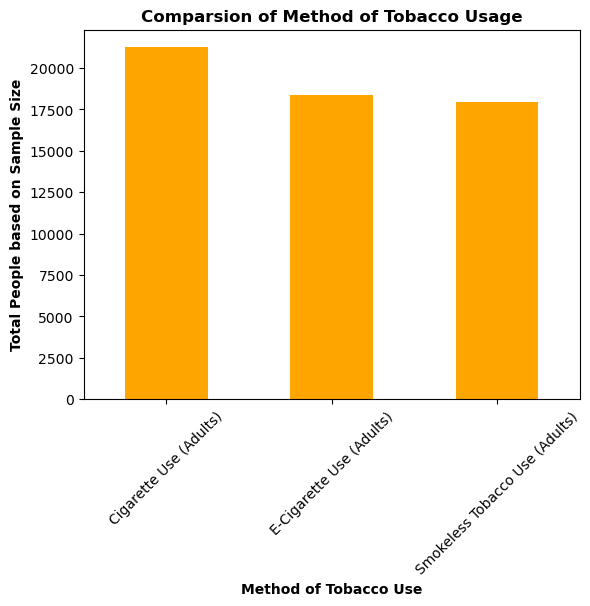

In [5]:
# Filter Data for Method of Tabacco Usage to Sample_Size and Graph
ConsumationType_df = Tobacco_Use_CA[Tobacco_Use_CA['Consumation_Type'].isin(['E-Cigarette Use (Adults)',
                                       'Cigarette Use (Adults)', 
                                       'Smokeless Tobacco Use (Adults)'])]


ConsumationType_data = ConsumationType_df.groupby('Consumation_Type')['Sample_Size'].sum().dropna()

print(ConsumationType_data)

# Plotting the bar chart
ConsumationType_data.plot(kind='bar', color='orange')
plt.title('Comparsion of Method of Tobacco Usage', fontweight = "bold")
plt.xlabel('Method of Tobacco Use', fontweight = "bold")
plt.ylabel('Total People based on Sample Size', fontweight = "bold")
plt.xticks(rotation=45)
plt.show()

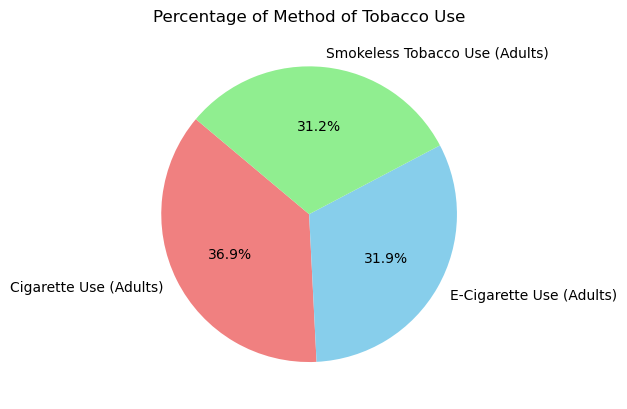

In [6]:
#Percentage of consumation usage based on sample_size
result = ConsumationType_data  / sample_size_sum *100
result

# Plotting the bar graph
plt.pie(result, labels=result.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue', 'lightgreen'])
plt.title('Percentage of Method of Tobacco Use')
plt.show()

**Analysis:

When comparing preferred consumation method of Tobacco usage in California. Cigarette Use is the most popular method which 5% mre perferred conpared to E-Cigarette Use and Smokeless Tobacco Use also known as chewing tobacco. 

                 Consumation_Type Usage_Frequency  Sample_Size
0          Cigarette Use (Adults)         Current      17432.0
1        E-Cigarette Use (Adults)         Current      17296.0
2  Smokeless Tobacco Use (Adults)         Current      17454.0


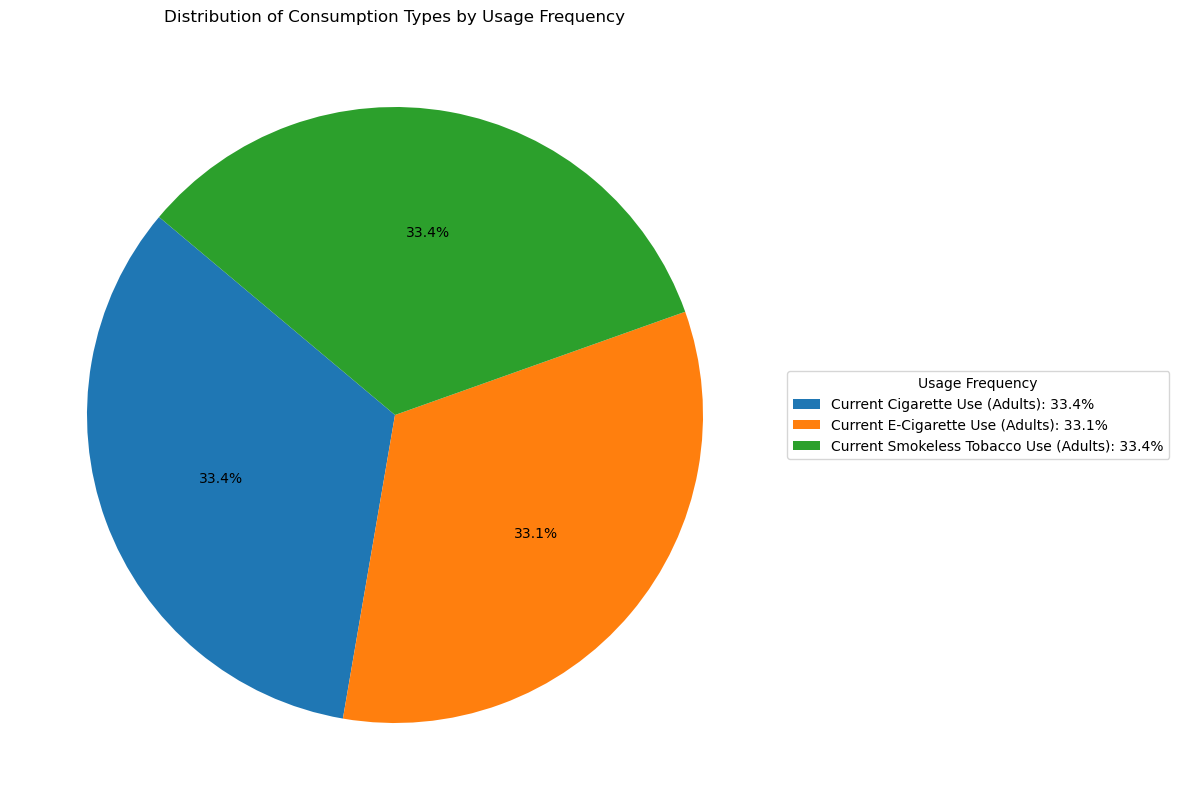

In [7]:
# DataFrame for required Consumation_Type and Usage_Frequency
frequency_df = Tobacco_Use_CA[Tobacco_Use_CA['Consumation_Type'].isin(['E-Cigarette Use (Adults)', 
                                                                       'Smokeless Tobacco Use (Adults)', 
                                                                       'Cigarette Use (Adults)'])]
frequency_df = frequency_df[frequency_df['Usage_Frequency'].isin(['Current'])]

# Group by consumation Type and Usage Frenqency with the Sample size sum, ignoring NaN values
grouped_data = frequency_df.groupby(['Consumation_Type', 'Usage_Frequency'])['Sample_Size'].sum().dropna()

# Creating a DataFrame from the grouped data
result_df = grouped_data.reset_index()
print(result_df)

UF = pd.DataFrame(result_df)

# Calculate percentage
UF['Percentage'] = (UF['Sample_Size'] / UF['Sample_Size'].sum()) * 100


# Plotting a pie chart with percentage labels and explode
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(UF['Percentage'], labels=None, autopct='%1.1f%%', startangle=140)

# Adding legend on the side with percentage labels
legend_labels = [f"{freq}: {percent:.1f}%" for freq, percent in zip(UF['Usage_Frequency'] + ' ' + 
                                                                    UF['Consumation_Type'], UF['Percentage'])]
plt.legend(wedges, legend_labels, title='Usage Frequency', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Consumption Types by Usage Frequency')
plt.show()

**Analysis**
When looking at current frequent users, there is not much difference in perference method of consumption. 

Gender                Consumation_Type  Female  Male  Overall  Total  \
0               Cigarette Use (Adults)       3     3        3      6   
1             E-Cigarette Use (Adults)       3     3        3      6   
2       Smokeless Tobacco Use (Adults)       1     3        3      4   

Gender  Male (%)  Female (%)  
0           50.0        50.0  
1           50.0        50.0  
2           75.0        25.0  


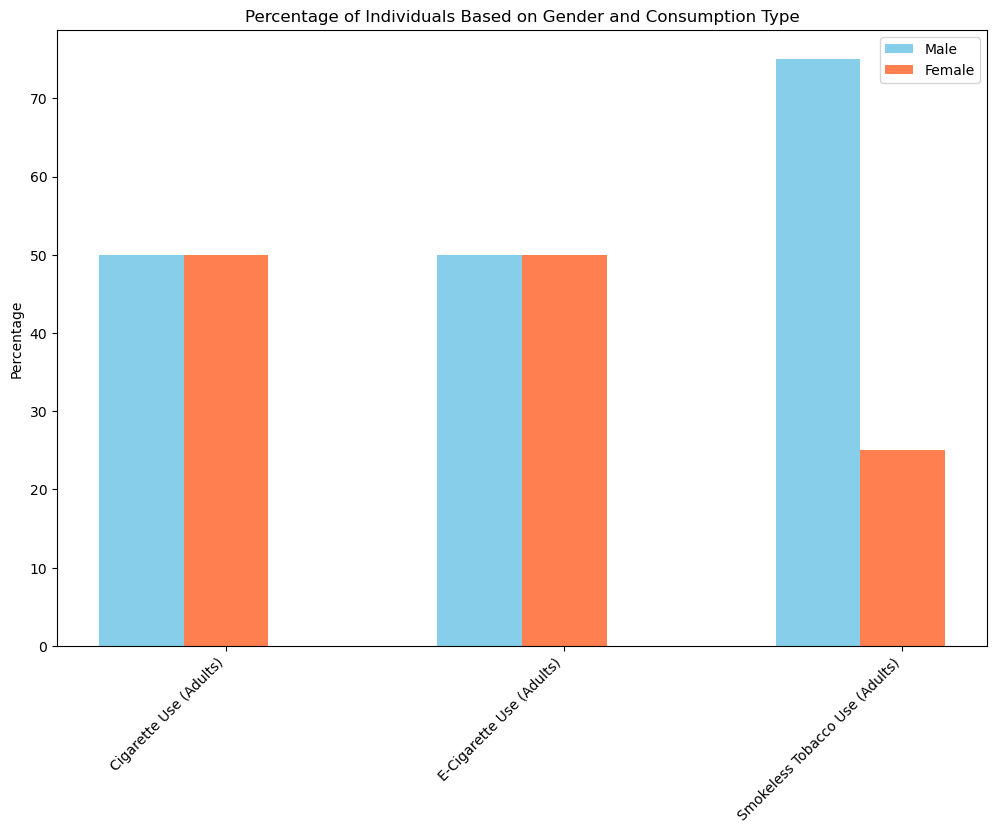

In [8]:
# Ignore NaN, rows with missing Sample_Size
Consume_Gender_df = Tobacco_Use_CA.dropna(subset=['Sample_Size'])

#DataFrame for required Consumation_Type
consumption_types = ['E-Cigarette Use (Adults)', 'Cigarette Use (Adults)', 'Smokeless Tobacco Use (Adults)']
consumption_df = Consume_Gender_df[Consume_Gender_df['Consumation_Type'].isin(consumption_types)]

# Group by Consumation Type and Gender, then calculate the percentage
percentConsume_Gender_df = consumption_df.groupby(['Consumation_Type', 'Gender']).size().unstack().reset_index()
percentConsume_Gender_df['Total'] = percentConsume_Gender_df['Male'] + percentConsume_Gender_df['Female'] 
percentConsume_Gender_df['Male (%)'] = (percentConsume_Gender_df['Male'] / percentConsume_Gender_df['Total']) * 100
percentConsume_Gender_df['Female (%)'] = (percentConsume_Gender_df['Female'] / percentConsume_Gender_df['Total']) * 100
print(percentConsume_Gender_df)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
bar_positions_male = range(len(percentConsume_Gender_df['Consumation_Type']))
bar_positions_female = [pos + bar_width for pos in bar_positions_male]
bar_positions_overall = [pos + 2 * bar_width for pos in bar_positions_male]

ax.bar(bar_positions_male, percentConsume_Gender_df['Male (%)'], width=bar_width, label='Male', color="skyblue")
ax.bar(bar_positions_female, percentConsume_Gender_df['Female (%)'], width=bar_width, label='Female', color="Coral")


ax.set_xticks([pos + bar_width for pos in bar_positions_male])
ax.set_xticklabels(percentConsume_Gender_df['Consumation_Type'], rotation=45, ha='right')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Individuals Based on Gender and Consumption Type')
ax.legend()

plt.show()

**Analysis** 
When looking at preferences based on Gender we see that males preferred smokeless Tobacco Use than females 